In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [3]:
print(len(X_train), len(X_test), len(set(y_train)))

25000 25000 2


In [4]:
print(X_train[0], y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1


리뷰 최대 길이: 2494
리뷰 평균 길이: 238.71364


(array([9.920e+02, 2.498e+03, 7.078e+03, 4.375e+03, 2.655e+03, 1.736e+03,
        1.336e+03, 9.880e+02, 7.260e+02, 5.830e+02, 4.280e+02, 3.370e+02,
        2.690e+02, 2.080e+02, 1.650e+02, 1.410e+02, 1.170e+02, 8.000e+01,
        7.600e+01, 1.030e+02, 8.000e+01, 7.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  11.  ,   60.66,  110.32,  159.98,  209.64,  259.3 ,  308.96,
         358.62,  408.28,  457.94,  507.6 ,  557.26,  606.92,  656.58,
         706.24,  755.9 ,  805.56,  855.22,  904.88,  954.54, 1004.2 ,
        1053.86, 1103.52, 1153.18, 1202.84, 1252.5 , 1302.16, 1351.82,
        1401.48, 1451.14, 1500.8 , 1550.46, 1600.12, 1649.78, 1699.44,
        1749.1 , 1798

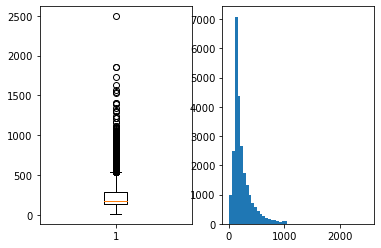

In [5]:
reviews_len = [len(review) for review in X_train]

print('리뷰 최대 길이: {}'.format(np.max(reviews_len)))
print('리뷰 평균 길이: {}'.format(np.mean(reviews_len)))

plt.subplot(1,2,1)
plt.boxplot(reviews_len)
plt.subplot(1,2,2)
plt.hist(reviews_len, bins=50)

In [6]:
unique_elements, count_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, count_elements)))

[[    0     1]
 [12500 12500]]


In [7]:
word_to_index = imdb.get_word_index()
index_to_word={}
for k, v in word_to_index.items():
    index_to_word[v+3] = k

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of bfafd718b763782e994055a2d397834f so we will re-download the data.
1654784/1641221 [==============================] - 1s 0us/step


In [8]:
print('빈도수 1등 단어:{}'.format(index_to_word[4]))
print('빈도수 3998등:{}'.format(index_to_word[3941]))

빈도수 1등 단어:the
빈도수 3998등:suited


In [11]:
for index,token in enumerate(("<pad>","<sos>","<unk>")):
    index_to_word[index] = token
    
print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

In [12]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [13]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print( X_train.shape, X_test.shape)

(25000, 500) (25000, 500)


In [14]:
model = Sequential()
model.add(Embedding(vocab_size,128,input_length=max_len))
# batch, 512 -> batch, 512, 128
model.add(LSTM(128))

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,428,225
Trainable params: 1,428,225
Non-

In [16]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('LSTM_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1, callbacks=[es,mc], batch_size=60, validation_split=0.2)

334/334 [==============================] - ETA: 0s - loss: 0.2492 - accuracy: 0.9035
Epoch 1: val_loss improved from 0.36144 to 0.30595, saving model to LSTM_model.h5
334/334 [==============================] - 1028s 3s/step - loss: 0.2492 - accuracy: 0.9035 - val_loss: 0.3059 - val_accuracy: 0.8728


In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print('손실률:', loss)
print('정확도:' ,accuracy)

782/782 [==============================] - 279s 356ms/step - loss: 0.3267 - accuracy: 0.8672
손실률: 0.3267457187175751
정확도: 0.8672400116920471


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

In [25]:
! pip install finance-datareader

     -------------------------------------- 48.8/48.8 KB 410.0 kB/s eta 0:00:00


In [26]:
import FinanceDataReader as fdr

STOCK_CODE = '005930' # 삼성전자 코드
dataset = fdr.DataReader(STOCK_CODE, start='2010-01-01', end='2021-12-30')

In [27]:
print(dataset.info())
print(dataset.isnull().sum())
print(dataset.iloc[[0,-1],:])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2962 entries, 2010-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2962 non-null   int64  
 1   High    2962 non-null   int64  
 2   Low     2962 non-null   int64  
 3   Close   2962 non-null   int64  
 4   Volume  2962 non-null   int64  
 5   Change  2962 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 162.0 KB
None
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
             Open   High    Low  Close    Volume    Change
Date                                                      
2010-01-04  16060  16180  16000  16180    239271  0.012516
2021-12-30  78900  79500  78100  78300  14236700 -0.006345


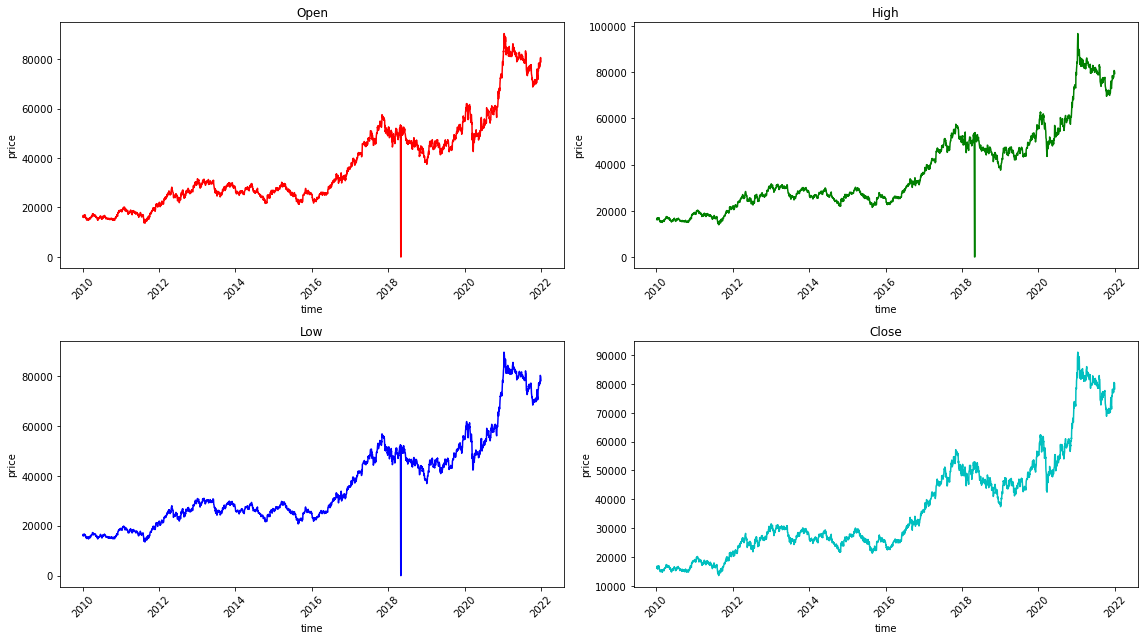

In [28]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,9)
color = ['r','g','b','c']

for i, col in enumerate(dataset.columns[:-2]):
    pos = ax[i//2, i%2]
    pos.plot(dataset.index, dataset[col], c=color[i])
    pos.set_title(f'{col}')
    pos.set_xlabel('time')
    pos.set_ylabel('price')
    pos.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [29]:
dataset[dataset['Open']==0]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-30,0,0,0,53000,0,0.0
2018-05-02,0,0,0,53000,0,0.0
2018-05-03,0,0,0,53000,0,0.0


In [33]:
drop_idx = dataset[dataset['Open']==0].index
dataset.drop(drop_idx, axis=0, inplace=True)

In [34]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()
scaled = MM.fit_transform(dataset.iloc[:,:4])
dataset_scaled = pd.DataFrame(scaled, columns=dataset.columns[:-2])
dataset_scaled.head()

,Open,High,Low,Close
0,0.031062,0.027034,0.033658,0.033333
1,0.037066,0.031861,0.037602,0.036693
2,0.037849,0.034757,0.040494,0.041602
3,0.040981,0.034757,0.037076,0.034367
4,0.035500,0.029930,0.035235,0.036434


In [35]:
def make_windowed_dataset(dataset, start_index, end_index, time_step, target_size, step, single_step=False):
    target = dataset['Close'].values
    dataset = dataset.to_numpy()
    data =[]
    labels = []
    strat_index = start_index + time_step
    if end_index is None:
        end_index = dataset.shape[0] - time_step
        
    for i in range(start_index, end_index):
        indexs = range(i - time_step, i , step)
        data.append(dataset[indexs])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

In [36]:
time_step = 30
train_size = int(dataset.shape[0] * 0.85)
x_train_single, y_train_single = make_windowed_dataset(dataset_scaled, 0, train_size, time_step,
                                                      0,1, single_step=True)

x_test_single, y_test_single = make_windowed_dataset(dataset_scaled, train_size, None, time_step,
                                                    0, 1, single_step = True)

print(f'train shape: {x_train_single.shape}')
print(f'test shape: {x_test_single.shape}')

train shape: (2515, 30, 4)
test shape: (414, 30, 4)


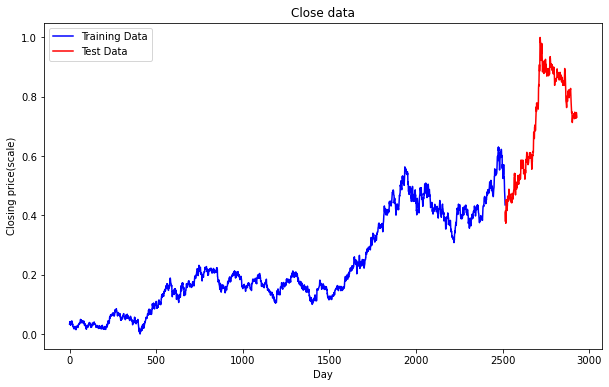

In [37]:
fig, ax = plt.subplots(1, figsize=(10,6))
ax.plot(range(len(y_train_single)), y_train_single, c='b', label='Training Data')
ax.plot(range(len(y_train_single), len(y_test_single)+len(y_train_single)), y_test_single, c='r',label='Test Data')
ax.set_title('Close data')
ax.set_xlabel('Day')
ax.set_ylabel('Closing price(scale)')
plt.legend()
plt.show()

In [38]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
tf.random.set_seed(42)
np.random.seed(42)

RNN_model = tf.keras.models.Sequential()
RNN_model.add(tf.keras.layers.SimpleRNN(100, activation='tanh', input_shape=(time_step,4)))
RNN_model.add(tf.keras.layers.Dense(1, activation='linear'))

loss = Huber()
RNN_model.compile(optimizer=Adam(1e-4), loss=loss, metrics=['mse'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopping = EarlyStopping(monitor='val_loss', patience=10)

filename = os.path.join('RNN', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

In [44]:
epoch=2
batch_size=32
RNN_model_history = RNN_model.fit(x_train_single, y_train_single, epochs=epoch, batch_size=batch_size,
                                 validation_data=(x_test_single, y_test_single),verbose=2,
                                 callbacks = [checkpoint , earlystopping])

Epoch 1/2

Epoch 1: val_loss improved from inf to 0.01765, saving model to RNN\checkpointer.ckpt
79/79 - 4s - loss: 0.0079 - mse: 0.0159 - val_loss: 0.0176 - val_mse: 0.0353 - 4s/epoch - 47ms/step
Epoch 2/2

Epoch 2: val_loss improved from 0.01765 to 0.01534, saving model to RNN\checkpointer.ckpt
79/79 - 1s - loss: 5.1780e-04 - mse: 0.0010 - val_loss: 0.0153 - val_mse: 0.0307 - 1s/epoch - 14ms/step


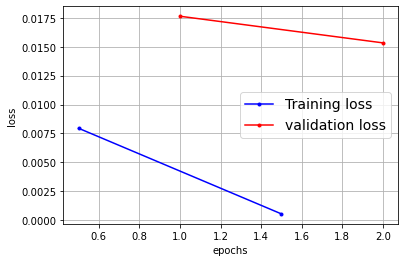

In [45]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss))+0.5, loss, 'b.-', label='Training loss')
    plt.plot(np.arange(len(val_loss)) +1, val_loss, 'r.-', label='validation loss')
    plt.legend(fontsize=14)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.grid(True)
    
plot_learning_curves(RNN_model_history.history['loss'], RNN_model_history.history['val_loss'])
plt.show()

In [46]:
LSTM_model = tf.keras.models.Sequential()
LSTM_model.add(tf.keras.layers.LSTM(100, activation='tanh', input_shape=(time_step,4)))
LSTM_model.add(tf.keras.layers.Dense(1,activation='linear'))

loss = Huber()
LSTM_model.compile(optimizer=Adam(1e-4), loss=loss, metrics=['mse'])

In [47]:
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

filename = os.path.join('LSTM','LSTM.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

In [48]:
epoch =2
batch_size =32
LSTM_model.history = LSTM_model.fit(x_train_single, y_train_single, epochs=epoch, batch_size=batch_size,
                                   validation_data=(x_test_single, y_test_single), verbose=2,
                                   callbacks=[checkpoint, earlystopping])

Epoch 1/2

Epoch 1: val_loss improved from inf to 0.00487, saving model to LSTM\LSTM.ckpt
79/79 - 9s - loss: 0.0030 - mse: 0.0059 - val_loss: 0.0049 - val_mse: 0.0097 - 9s/epoch - 118ms/step
Epoch 2/2

Epoch 2: val_loss improved from 0.00487 to 0.00266, saving model to LSTM\LSTM.ckpt
79/79 - 3s - loss: 6.6698e-04 - mse: 0.0013 - val_loss: 0.0027 - val_mse: 0.0053 - 3s/epoch - 42ms/step


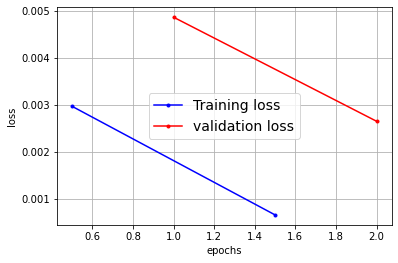

In [50]:
plot_learning_curves(LSTM_model.history.history['loss'], LSTM_model.history.history['val_loss'])
plt.show()

In [51]:
def show_plot(plot_data, delta, title):
    labels=['past','True','rnn','lstm']
    marker = ['.-','rx','go','cs']
    time_steps = list(range(-plot_data[0].shape[0],0))
    
    if delta:
        future = delta
    else:
        future=0
        
    plt.title(title)
    for i, x in enumerate(plot_data):
        if i :
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+3)*2])
    plt.xlabel('time_step')
    return plt

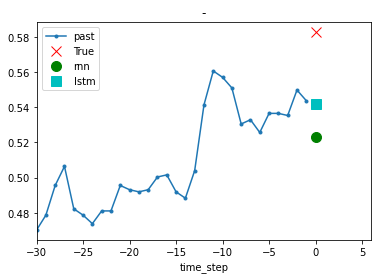

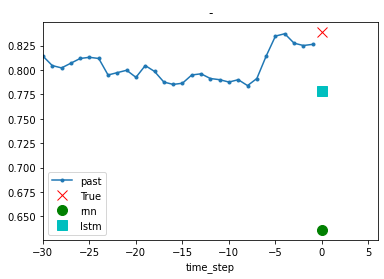

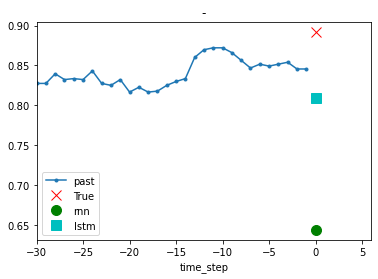

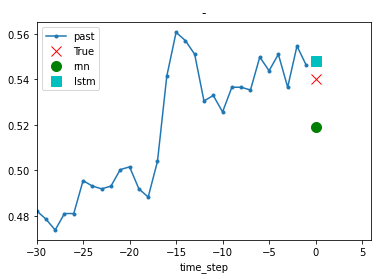

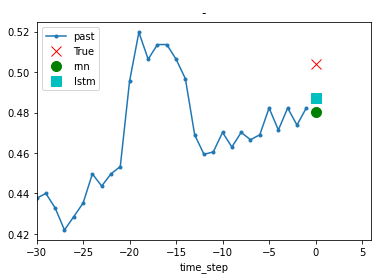

In [52]:
# 하루뒤 종가 예측 5개 샘플
idx = np.random.choice(y_test_single.shape[0],5)

for i in idx:
    rnn_sample = RNN_model.predict(x_test_single[i][np.newaxis, ...])
    lstm_sample = LSTM_model.predict(x_test_single[i][np.newaxis, ...])
    
    plot = show_plot([x_test_single[i][:,1], y_test_single[i], rnn_sample, lstm_sample], 0, '-')
    plot.show()

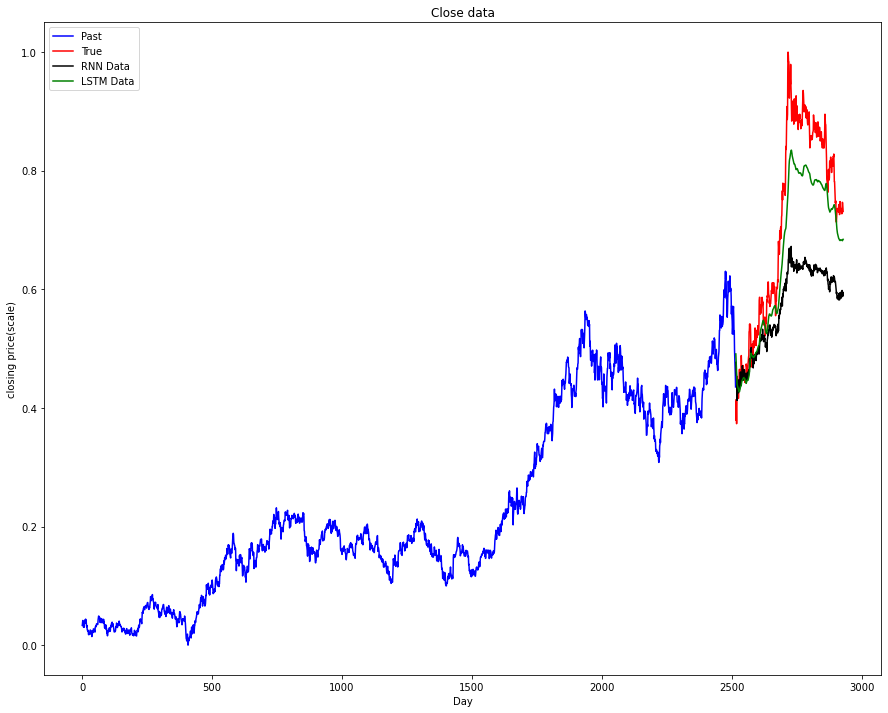

In [53]:
# 테스트 데이터 예측
fig, ax = plt.subplots(1, figsize=(15,12))
ax.plot(range(len(y_train_single)), y_train_single, c='b', label='Past')
ax.plot(range(len(y_train_single), len(y_test_single)+len(y_train_single)), y_test_single, c='r', label='True')
ax.plot(range(len(y_train_single), len(y_test_single)+len(y_train_single)), RNN_model.predict(x_test_single), c='k', label='RNN Data')
ax.plot(range(len(y_train_single), len(y_test_single)+len(y_train_single)), LSTM_model.predict(x_test_single), c='g', label='LSTM Data')
ax.set_title('Close data')
ax.set_xlabel('Day')
ax.set_ylabel('closing price(scale)')
plt.legend()
plt.show()